# **###Trabalhando com Planilhas**

In [94]:
import pandas as pd
import matplotlib

In [95]:
df1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Salvador.xlsx")

In [3]:
#juntando todos os arquivos 
df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
#exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
#exibindo as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
#alterando tipo de dado da coluna LojaID
df ["LojaID"] = df["LojaID"].astype("object")

In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [11]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


# **Tratando valores Faltantes **

In [12]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:

#apangando linhas com valores nulos
df.dropna(inplace= True)

In [16]:
#apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"],inplace=True)

In [17]:
#removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all",inplace=True)

## **Criando colunas novas**

In [19]:

#Criando a coluna de receita 
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [20]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [23]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [24]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [25]:
#Retornando a maior Receita 
df["Receita"].max()


3544.0

In [26]:
#Retornandoa menor Receita
df["Receita"].min()


3.34

In [27]:
#nlargest retorna as maiores receitas 
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [28]:
#nsamllest retorna as piores receitas
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [29]:
#agrupamento por cidade 
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [30]:
#ordenando conjunto de Dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# **Trabalhando com Datas**

In [31]:
#trasnformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [32]:
#veriifcando 
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [33]:
#Transformadno coluna de data em data 
df["Data"] = pd.to_datetime(df["Data"])

In [34]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [35]:
#agrupamento por ano 
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [36]:
#Criando uma nova coluna com o ano
df["Ano_venda"] = df["Data"].dt.year

In [37]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda
68,Recife,2019-01-01,175.45,980,3,526.35,3.0,2019
132,Natal,2019-01-02,19.61,1036,2,39.22,2.0,2019
58,Aracaju,2018-01-01,37.14,1520,7,259.98,7.0,2018
66,Fortaleza,2019-01-01,35.11,1005,6,210.66,6.0,2019
62,Fortaleza,2019-01-01,106.21,1005,6,637.26,6.0,2019


In [38]:
#extraindo o mes e o dia 
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month,df["Data"].dt.day)

In [39]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda
86,Aracaju,2018-01-01,154.92,1521,5,774.60,5.0,2018,1,1
128,Fortaleza,2019-03-02,38.70,982,4,154.80,4.0,2019,3,2
46,Fortaleza,2019-01-01,6.45,1003,3,19.35,3.0,2019,1,1
66,Aracaju,2018-01-01,76.59,1523,4,306.36,4.0,2018,1,1
178,Natal,2019-01-02,39.28,1037,3,117.84,3.0,2019,1,2


In [40]:
#retornando a Data mais antiga 
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [41]:
#Calculando diferença de dias
df["diferenca_dias"] = df["Data"] = df["Data"].min()

In [42]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias
110,Fortaleza,2018-01-01,51.98,983,6,311.88,6.0,2019,3,2,2018-01-01
192,Natal,2018-01-01,166.51,1036,1,166.51,1.0,2019,1,2,2018-01-01
68,Fortaleza,2018-01-01,85.09,1005,6,510.54,6.0,2019,1,1,2018-01-01
42,Fortaleza,2018-01-01,38.71,1004,5,193.55,5.0,2019,1,1,2018-01-01
53,Fortaleza,2018-01-01,11.48,1002,4,45.92,4.0,2019,1,1,2018-01-01


In [45]:
#Criando coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [46]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias,Semestre_venda,trimestre_venda
33,Fortaleza,2018-01-01,19.56,1005,1,19.56,1.0,2019,1,1,2018-01-01,1,1
81,Salvador,2018-01-01,17.36,1037,2,34.72,2.0,2019,1,1,2018-01-01,1,1
239,Salvador,2018-01-01,161.41,1037,3,484.23,3.0,2019,1,3,2018-01-01,1,1
162,Natal,2018-01-01,23.08,1036,2,46.16,2.0,2019,1,2,2018-01-01,1,1
191,Natal,2018-01-01,173.59,1034,2,347.18,2.0,2019,1,2,2018-01-01,1,1


In [49]:
#filtrando venda de 2019 do mes de Março 
vendas_março_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [52]:
vendas_março_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias,Semestre_venda,trimestre_venda


**Visualizando Dados**

In [59]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

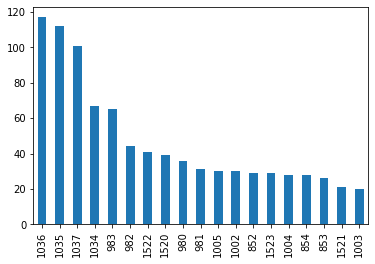

In [70]:
#grafico de barras 
df["LojaID"].value_counts(ascending=False).plot.bar();

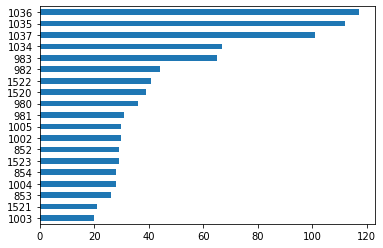

In [69]:
#grafio horizontal
df["LojaID"].value_counts(ascending=True).plot.barh();

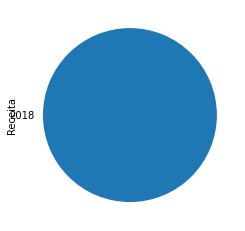

In [72]:
#grafio de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [73]:
#Total de Vendas
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

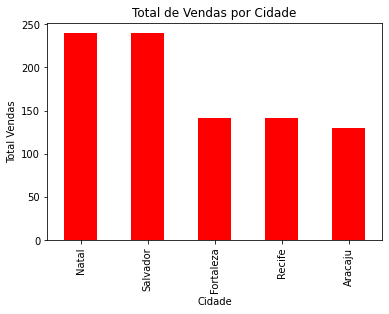

In [75]:
#Adicionando Titulos e alterando o nome dos Eixos 
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [77]:
#alterando estilo
plt.style.use("ggplot")

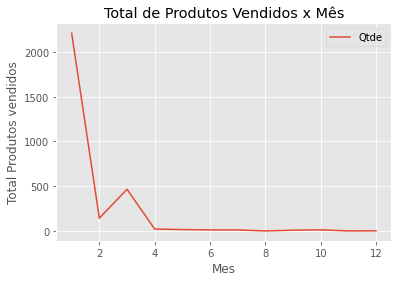

In [81]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title= "Total de Produtos Vendidos x Mês")
plt.xlabel("Mes")
plt.ylabel("Total Produtos vendidos")
plt.legend();

In [82]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64